# **Flight Price Prediction**

In [1]:
# Impot Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error

# LinearRegession
from sklearn.linear_model import LinearRegression

# DecisionTree
from sklearn.tree import DecisionTreeRegressor

# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# **Importing dataset**




1.   Since data is in form of excel file we have to use pandas read_excel to load the data

2.   After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

3.   Check whether any null values are there or not. if it is present then following can be done,




*   Imputing data using Imputation method in sklearn
*   Filling NaN values with mean, median and mode using fillna() method




4.   Describe data --> which can give statistical analysis







In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.xlsx to Data_Train.xlsx
Saving Test_set.xlsx to Test_set.xlsx


In [3]:
train_data = pd.read_excel("Data_Train.xlsx")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**test_data have no price feature because this is dependent feature**

# **Understand Dataset**
### size of Trainning DataSet -->> 10683

**Features**
### Airline -->>-->-->	The name of the Airline
### Date_of_Journey --> The Date of the Journey
### Source -->-->-->--> The source from which the service begins
### Destination -->-->  The Destination where the service begins
### Route -->-->-->-->  The route taken by the flight to reach the destination
### Dep_Time -->-->-->  The Time when the journey start from the source
### Arrival_Time -->    Time for Arrival for the destination
### Duration -->-->-->  Total Duration of Flight
### Total_Stops -->     Total stops between the source and destination
### Additional_Info --> Aditional information about the flight
### Price -->-->-->-->  The Price of the Ticket


In [7]:
train_data.shape

(10683, 11)

**Check Missing Values**

In [8]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


**Drop missing values**

In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isnull().sum().sum()

0

**Check Duplicates Values**

In [11]:
train_data.duplicated().sum()

220

In [12]:
# Drop Duplicate Values
train_data.drop_duplicates(inplace =True)

In [13]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [14]:
train_data.shape

(10462, 11)

**Train DataSet information**

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


**Statistical Analysis**

In [16]:
train_data.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


#  **Data Analysis And Visualization on train dataSet**

In [17]:
train_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
for i in train_data:
  print(f"Unique values in {[i]} is -->> [{train_data[i].unique()}]")

Unique values in ['Airline'] is -->> [['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']]
Unique values in ['Date_of_Journey'] is -->> [['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']]
Unique values in ['Source'] is -->> [['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']]
Unique values in ['Destination'] is -->> [['New Delhi' 'Banglore' '

In [19]:
for i in train_data:
    print(f"Number of unique values in {i} -->> {train_data[i].nunique()}")

Number of unique values in Airline -->> 12
Number of unique values in Date_of_Journey -->> 44
Number of unique values in Source -->> 5
Number of unique values in Destination -->> 6
Number of unique values in Route -->> 128
Number of unique values in Dep_Time -->> 222
Number of unique values in Arrival_Time -->> 1343
Number of unique values in Duration -->> 368
Number of unique values in Total_Stops -->> 5
Number of unique values in Additional_Info -->> 10
Number of unique values in Price -->> 1870


In [20]:
for i in train_data:
    print(train_data[i].value_counts())

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    

# **Airline**

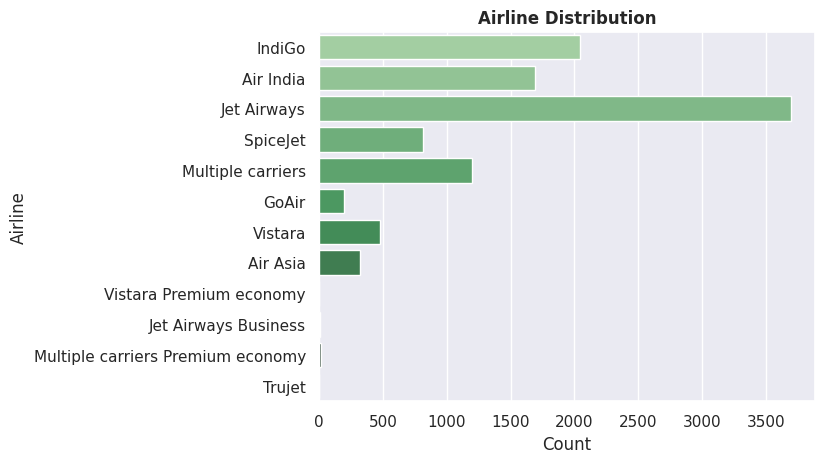

In [21]:
sns.countplot(train_data["Airline"] ,palette='Greens_d')
plt.title("Airline Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

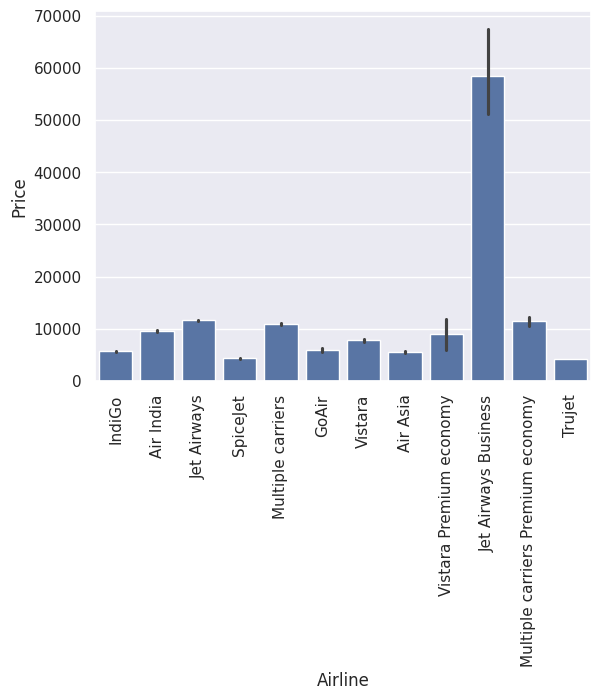

In [22]:
sns.barplot(x = train_data["Airline"] , y = train_data["Price"] , estimator = 'mean')
plt.xticks(rotation = 90)
plt.show()

# **Source**

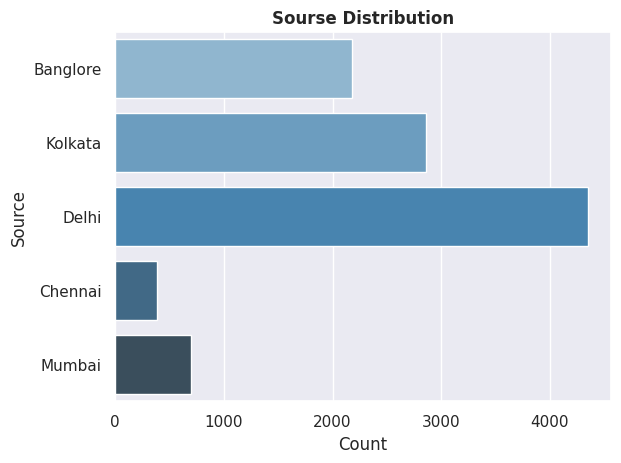

In [23]:
sns.countplot(train_data["Source"] , palette='Blues_d')
plt.title("Sourse Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Source")
plt.show()

# **Destination**

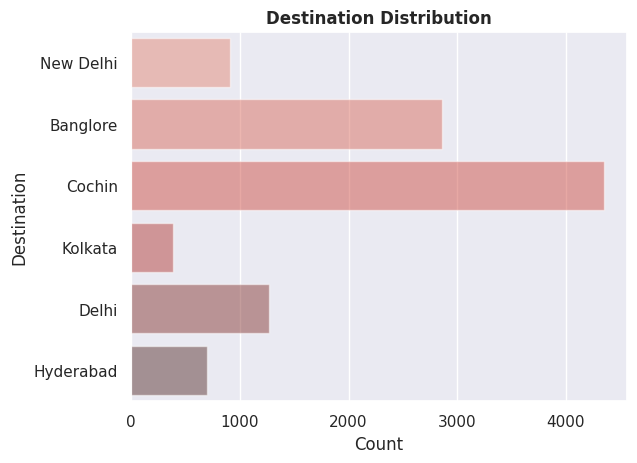

In [24]:
sns.countplot(train_data["Destination"] , palette='Reds_d' , alpha=0.5)
plt.title("Destination Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Destination")
plt.show()

# **Route**

In [25]:
# Top 10 used Routes and visualize using barplot
top_routes = train_data["Route"].value_counts().sort_values(ascending = False)[:10]
top_routes

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
CCU → DEL → BLR,565
BLR → BOM → DEL,402
MAA → CCU,381
DEL → HYD → COK,326


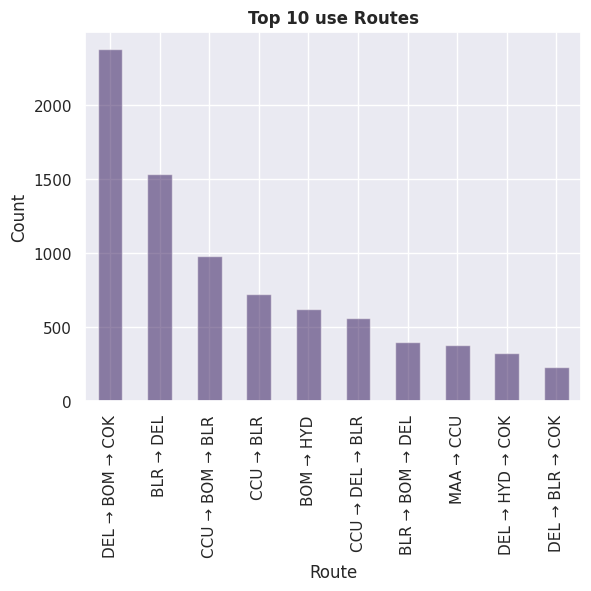

In [26]:
sns.set_palette('inferno')

top_routes.plot(kind="bar"  , alpha=0.5)
plt.title("Top 10 use Routes" , fontweight ="bold")
plt.ylabel("Count")

plt.show()

In [27]:
# Less used routes
bottom_routes = train_data["Route"].value_counts().sort_values(ascending = True)[:10]
bottom_routes

,count
Route,
BOM → BBI → HYD,1
BOM → RPR → VTZ → HYD,1
BLR → CCU → BBI → HYD → VGA → DEL,1
BLR → BOM → IXC → DEL,1
BLR → HBX → BOM → NAG → DEL,1
BOM → VNS → DEL → HYD,1
BOM → JAI → DEL → HYD,1
CCU → IXB → DEL → BLR,1
BOM → GOI → HYD,1


# **Total_Stops**

In [28]:
# Total_Stops visualize
train_data["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


**non Stop means '0' Stop**

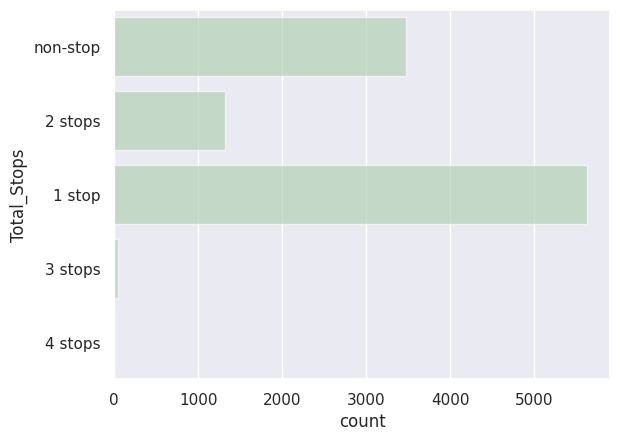

In [29]:
sns.countplot(train_data["Total_Stops"] , color="#A3D2A3" ,alpha=0.6)
plt.show()

**Insight**:

*   4-stop routes are used only once in the dataset.
*   3-stop routes are also used very infrequently.
*   1-stop routes are the most commonly used.



# **Additional_Info**

In [30]:
train_data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

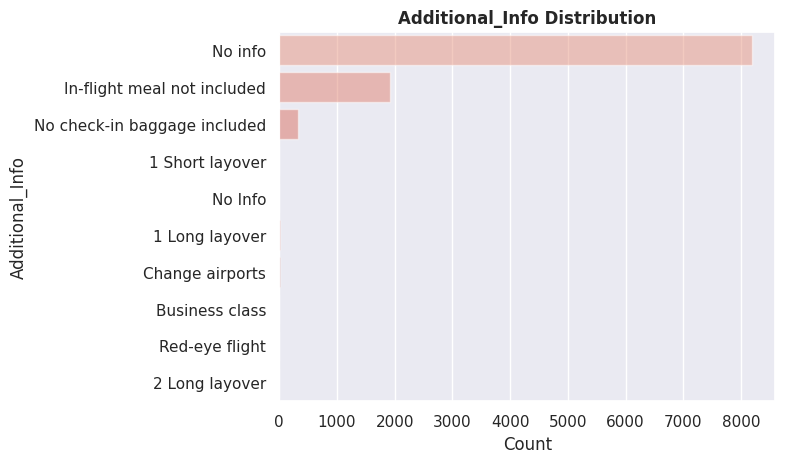

In [31]:
sns.countplot(train_data["Additional_Info"] , palette='Reds_d' , alpha=0.5)
plt.title("Additional_Info Distribution" , fontweight ="bold")
plt.xlabel("Count")
plt.ylabel("Additional_Info")
plt.show()

**Insight:**

 In the Additional_Info column, more than 70-80% of the data lacks information. Therefore, this feature should be dropped to improve the efficiency of model training.

In [32]:
train_data.drop('Additional_Info' , axis = 1 , inplace = True)

# **Price**

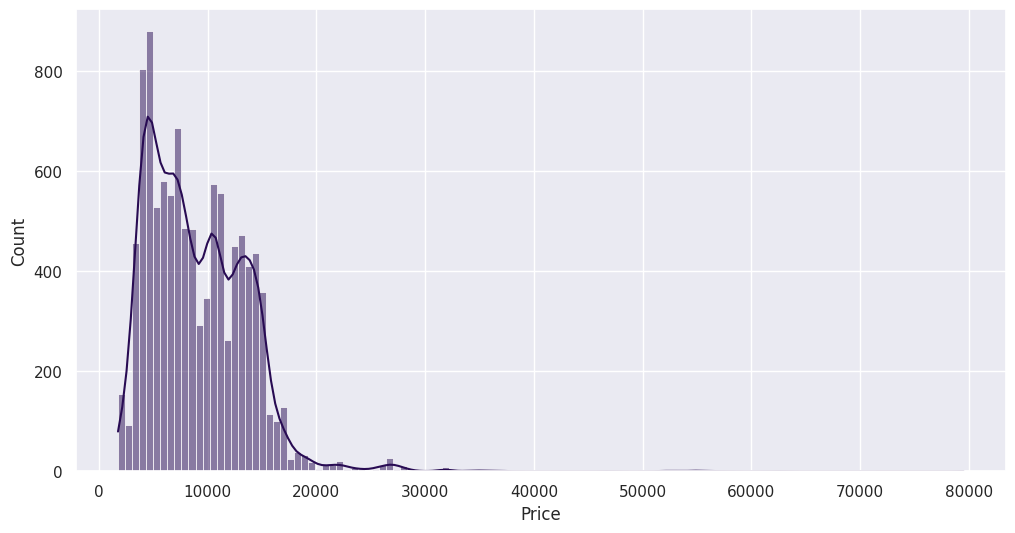

In [33]:
# plot "Price" feature using histplot
plt.figure(figsize=(12,6))
sns.histplot(train_data["Price"] , kde= True , palette='Blues_d')

plt.show()

**Airline vs Price**

In [34]:
colors = ['#A3D2A3','#E6B3B3','#C7E1A6','#B3E0E0','#A0D7D7','#C2C7E1','#D9E1C3' ,"#24C06A" ,'#B3E5BB','#A2D6A6','#A3C1AD']

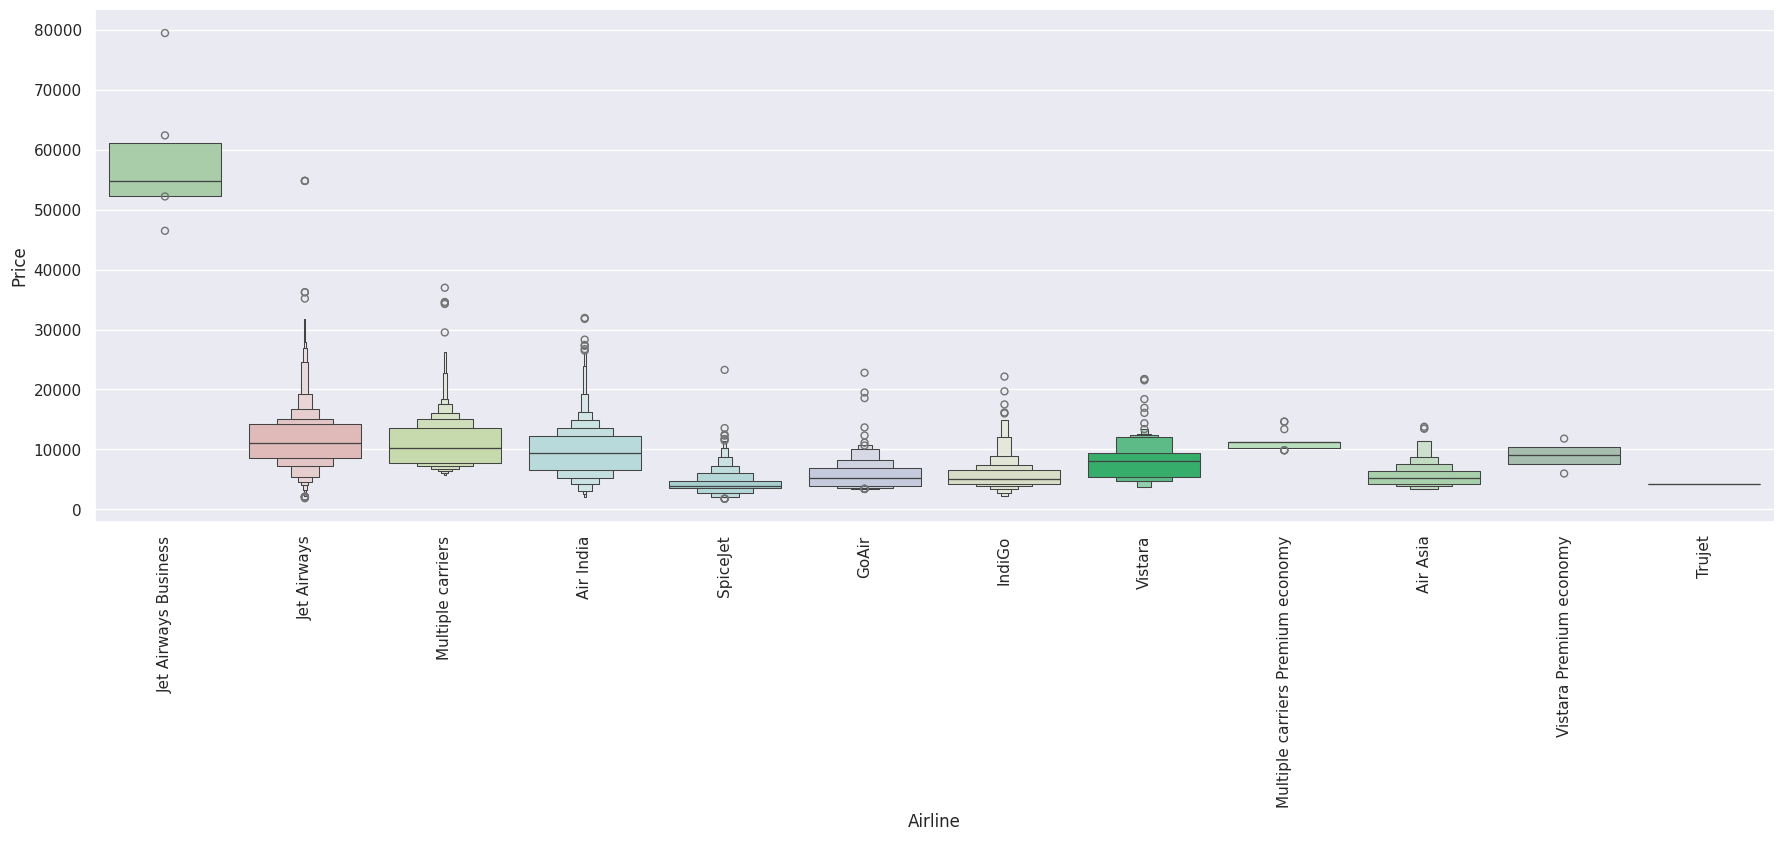

In [35]:
# plt.figure(figsize=(12,8))
sns.catplot(x="Airline" , y="Price" ,data=train_data.sort_values("Price" , ascending =False) , kind = "boxen" , palette = colors ,height = 6, aspect=3)
plt.xticks(rotation = 90)
plt.show()

**Source vs Price**

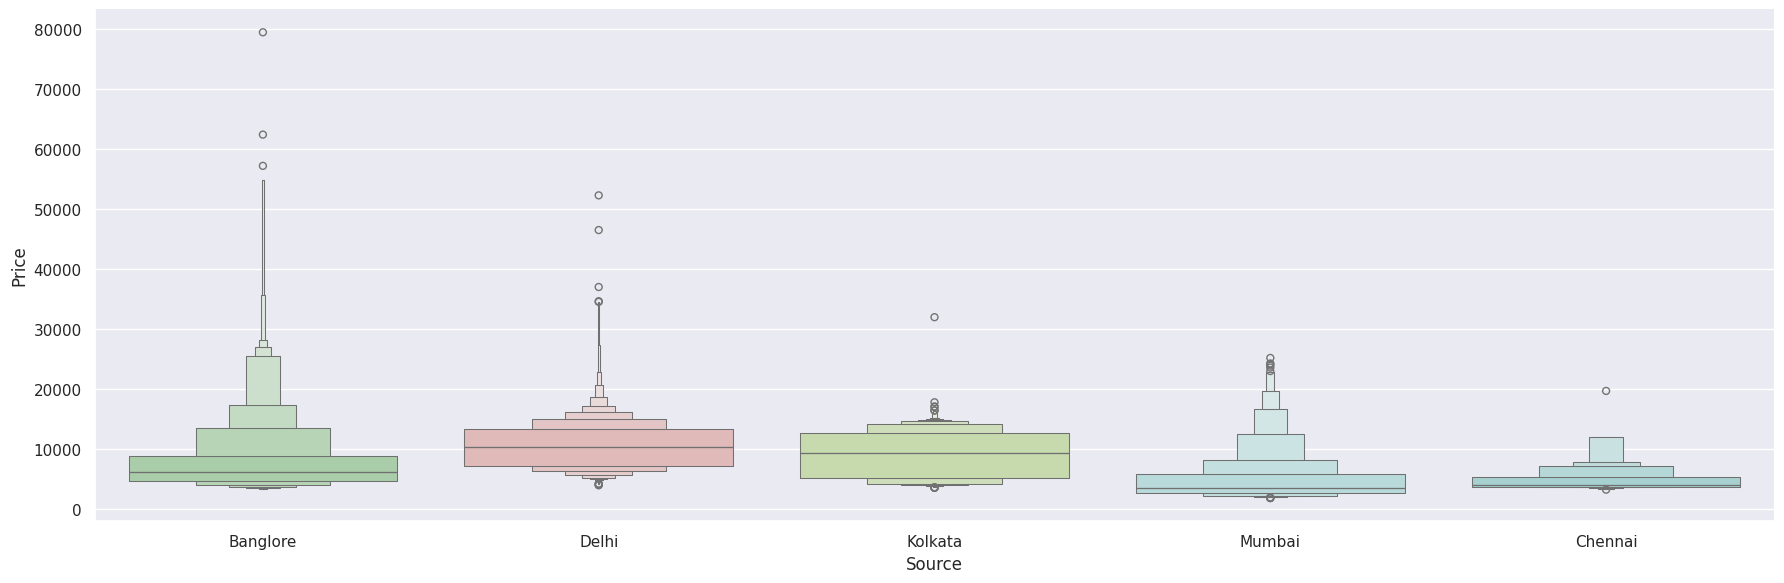

In [36]:
sns.catplot(x="Source" , y="Price" , data=train_data.sort_values("Price" , ascending = False) , kind="boxen" , palette = colors ,height =6 , aspect =3)
plt.show()

**Destination vs Price**

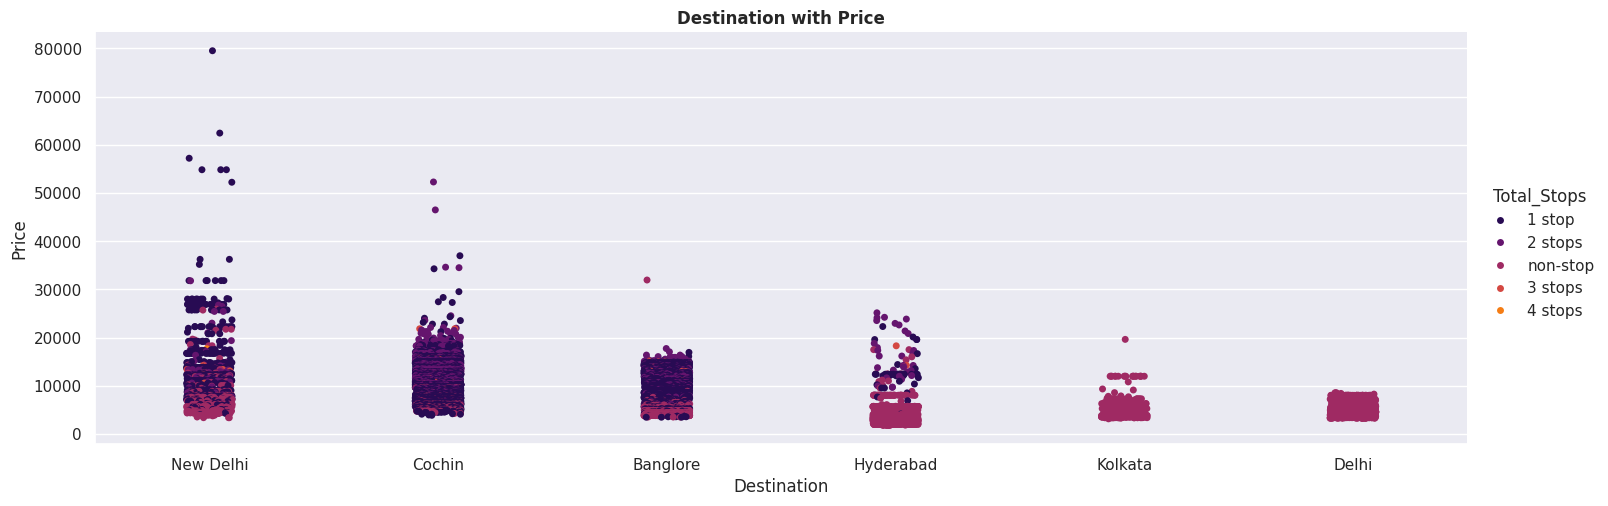

In [37]:
sns.catplot(x="Destination" , y="Price" , data=train_data.sort_values("Price", ascending=False) , hue="Total_Stops"  , aspect =3)

plt.title("Destination with Price" , fontweight = "bold")
plt.show()

**Route vs Price**

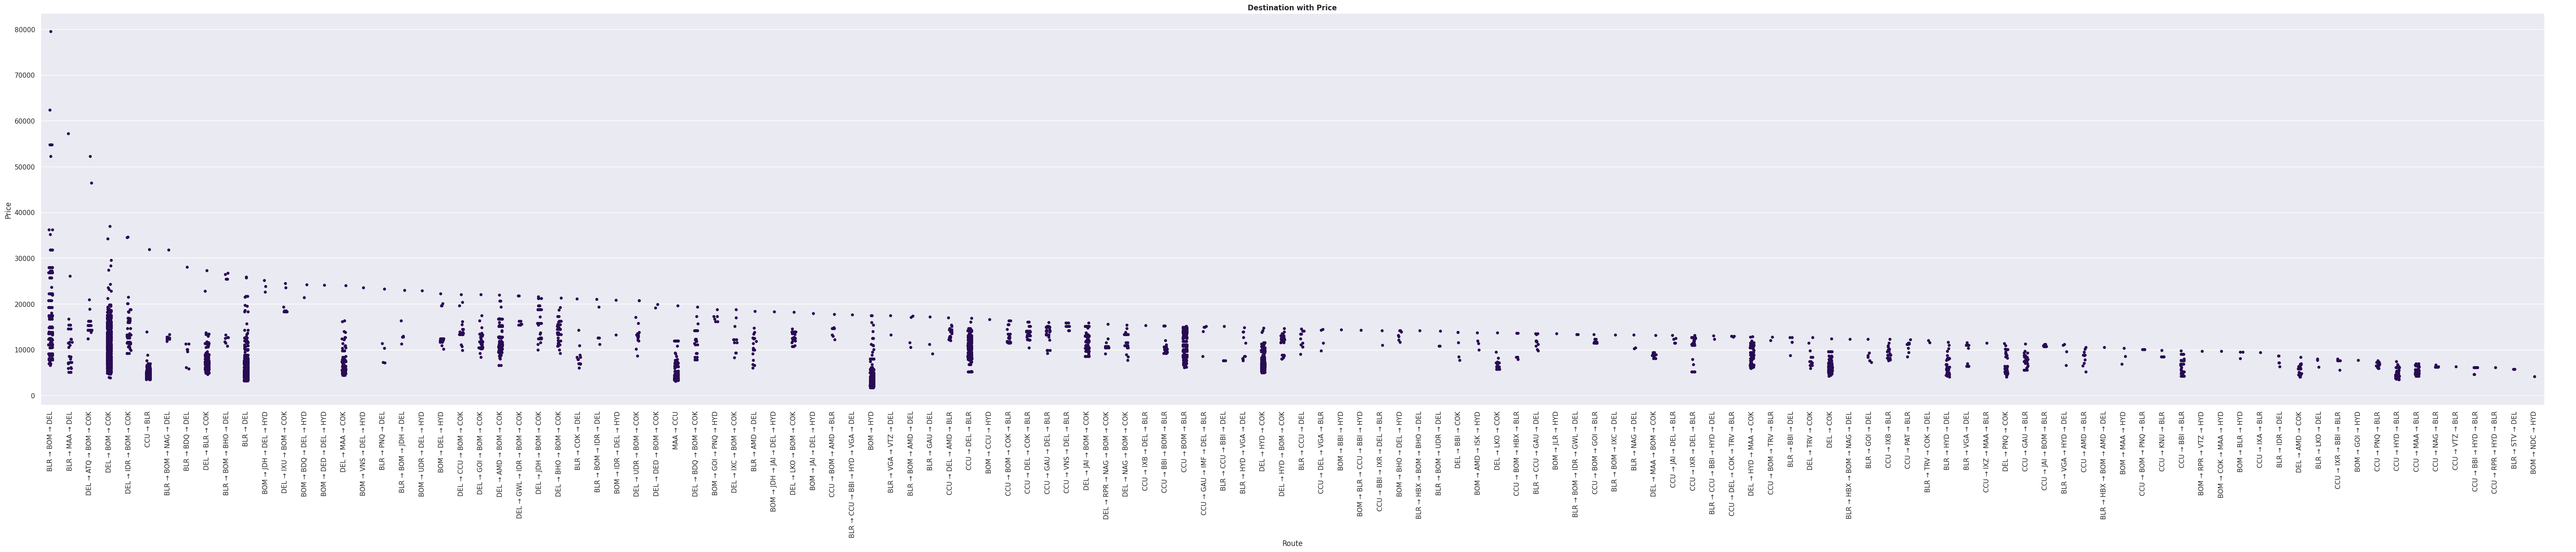

In [38]:
sns.catplot(x="Route" , y="Price" , data=train_data.sort_values("Price", ascending=False) , height = 10 ,aspect =6)
plt.title("Destination with Price" , fontweight = "bold")
plt.xticks(rotation =90)
plt.show()

# **Featue Engineering**

In [39]:
train_data.shape

(10462, 10)

In [40]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Price,0


In [41]:
# Before Feature engieering
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Price            10462 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 899.1+ KB



**Date_of_Journey**

In [42]:
train_data["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [43]:
# Create a two Feawtures from "Date_of_Journey" Feature and drop this
#  we donot need years because this dataset belong to same year
train_data["Date"] = train_data["Date_of_Journey"].str.split("/").str[0]
train_data["Month"] = train_data["Date_of_Journey"].str.split("/").str[1]

# Drop "Date_of_Journey"
train_data.drop("Date_of_Journey", inplace=True, axis=1)

# Convert All String  to Int
train_data["Date"] = train_data["Date"].astype(int)
train_data["Month"] = train_data["Month"].astype(int)


In [44]:

train_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6


**Total_Stops**

In [45]:
# "Total_Stops" nan value replace with 1 stop and non-stop with 1 stop
train_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Non_stop mean '0' stop

In [46]:
train_data["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [47]:
train_data["Stops"] = train_data["Total_Stops"].replace({'non-stop' : 0 , '1 stop' : 1 , "2 stops" : 2 , '3 stops' : 3 ,"4 stops" :4 })
#  Drop 'Total_Stops'
train_data.drop('Total_Stops' ,axis=1 ,inplace = True)

In [48]:
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Price,Date,Month,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,3897,24,3,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,7662,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,13882,9,6,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,6218,12,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,13302,1,3,1


**Arrival_Time**

In [49]:
train_data["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [50]:
#  donot need of date in "Arrival_Time" so remove only take 'time"
train_data["Arrival_Time"] = train_data["Arrival_Time"].str.split(" ").str[0]

In [51]:
# create a two new features "Arrival_hour" and "Arrival_min" from "Arrival_Time"
train_data["Arrival_hour"] = train_data["Arrival_Time"].str.split(":").str[0]
train_data["Arrival_min"] = train_data["Arrival_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
train_data.drop("Arrival_Time", axis =1 ,inplace =True)

In [52]:
# convert into int
train_data["Arrival_hour"] = train_data["Arrival_hour"].astype(int)
train_data["Arrival_min"] = train_data["Arrival_min"].astype(int)

In [53]:
train_data.head(4)

,Airline,Source,Destination,Route,Dep_Time,Duration,Price,Date,Month,Stops,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,3897,24,3,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,7662,1,5,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,13882,9,6,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,6218,12,5,1,23,30


**Dep_Time**

In [54]:
train_data["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [55]:
# create a two new features "Dep_hour" and "Dep_min" from "Dep_Time"
train_data["Dep_hour"] = train_data["Dep_Time"].str.split(":").str[0]
train_data["Dep_min"] = train_data["Dep_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
train_data.drop("Dep_Time", axis =1 ,inplace =True)

# convert into int
train_data["Dep_hour"] = train_data["Dep_hour"].astype(int)
train_data["Dep_min"] = train_data["Dep_min"].astype(int)

In [56]:
train_data.head(4)

,Airline,Source,Destination,Route,Duration,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,3897,24,3,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,7662,1,5,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,13882,9,6,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,6218,12,5,1,23,30,18,5


**Duration**

In [57]:
train_data["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [58]:
# create "Duration_hour" featur from "Duration"
train_data["Duration_hour"] = train_data["Duration"].str.split(" ").str[0]
train_data["Duration_hour"] = train_data["Duration_hour"].str.split("h").str[0]
# Create "Duration_min" feature
train_data["Duration_min"] = train_data["Duration"].str.split(" ").str[1]
train_data["Duration_min"] = train_data["Duration_min"].str.split("m").str[0]
# Drop Duration feature
train_data.drop("Duration" ,axis = 1 , inplace =True)

**Duration_min**

In [59]:
train_data["Duration_min"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [60]:
train_data["Duration_hour"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [61]:
train_data["Duration_min"] = train_data["Duration_min"].replace(np.nan , "0")
train_data["Duration_hour"] = train_data["Duration_hour"].replace("5m" , "5")

# convert in int
train_data["Duration_min"] = train_data["Duration_min"].astype('int')
train_data["Duration_hour"] = train_data["Duration_hour"].astype('int')

In [62]:
train_data.head(5)

,Airline,Source,Destination,Route,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,24,3,0,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,1,5,2,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,6,2,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,12,5,1,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,1,3,1,21,35,16,50,4,45


**Route**

In [63]:
train_data["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

**Routes and stop doing same work so we drop routes**

In [64]:
train_data.drop('Route' ,axis = 1 , inplace = True)

In [65]:
train_data.head(3)

,Airline,Source,Destination,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3897,24,3,0,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7662,1,5,2,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,13882,9,6,2,4,25,9,25,19,0


In [66]:
# After feature engineering
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10462 non-null  object
 1   Source         10462 non-null  object
 2   Destination    10462 non-null  object
 3   Price          10462 non-null  int64 
 4   Date           10462 non-null  int64 
 5   Month          10462 non-null  int64 
 6   Stops          10462 non-null  int64 
 7   Arrival_hour   10462 non-null  int64 
 8   Arrival_min    10462 non-null  int64 
 9   Dep_hour       10462 non-null  int64 
 10  Dep_min        10462 non-null  int64 
 11  Duration_hour  10462 non-null  int64 
 12  Duration_min   10462 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.4+ MB


In [67]:
train_data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Price,0
Date,0
Month,0
Stops,0
Arrival_hour,0
Arrival_min,0
Dep_hour,0


# **Test Dataset**

In [68]:
# Load Dataset
test_data = pd.read_excel("Test_set.xlsx")

In [69]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [70]:
# Check and handle null values
print("Null Values:")
print(test_data.isnull().sum())

if test_data.isnull().sum().sum() > 0:
    test_data.dropna(inplace=True)
    print("Null values dropped successfully.")
else:
    print("No null values found.")

print("\n")
print("\n")

# Check and handle duplicate values
print("Duplicate Values:")
duplicate_count = test_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    test_data.drop_duplicates(inplace=True)
    print("Duplicate rows dropped successfully.")
else:
    print("No duplicate rows found.")

print("\n")
print("\n")

test_data.info()


print("\n")
print("\n")

print("Before feature engineering data information")
print("\n")

# Date_of_Journey

# Create a two Feawtures from "Date_of_Journey" Feature and drop this
#  we donot need years because this dataset belong to same year
test_data["Date"] = test_data["Date_of_Journey"].str.split("/").str[0]
test_data["Month"] = test_data["Date_of_Journey"].str.split("/").str[1]

# Drop "Date_of_Journey"
test_data.drop("Date_of_Journey", inplace=True, axis=1)

# Convert All String  to Int
test_data["Date"] = test_data["Date"].astype(int)
test_data["Month"] = test_data["Month"].astype(int)



# Total_Stops

# "Total_Stops" nan value replace with 1 stop and non-stop with 1 stop
test_data["Total_Stops"].unique()


test_data["Stops"] = test_data["Total_Stops"].replace({'non-stop' : 0 , '1 stop' : 1 , "2 stops" : 2 , '3 stops' : 3 ,"4 stops" :4 })
#  Drop 'Total_Stops'
test_data.drop('Total_Stops' ,axis=1 ,inplace = True)

#  donot need of date in "Arrival_Time" so remove only take 'time"
test_data["Arrival_Time"] = test_data["Arrival_Time"].str.split(" ").str[0]
# create a two new features "Arrival_hour" and "Arrival_min" from "Arrival_Time"
test_data["Arrival_hour"] = test_data["Arrival_Time"].str.split(":").str[0]
test_data["Arrival_min"] = test_data["Arrival_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
test_data.drop("Arrival_Time", axis =1 ,inplace =True)
# convert into int
test_data["Arrival_hour"] = test_data["Arrival_hour"].astype(int)
test_data["Arrival_min"] = test_data["Arrival_min"].astype(int)


# Dep_Time

# create a two new features "Dep_hour" and "Dep_min" from "Dep_Time"
test_data["Dep_hour"] = test_data["Dep_Time"].str.split(":").str[0]
test_data["Dep_min"] = test_data["Dep_Time"].str.split(":").str[1]
# and Drop "Arrival_Time"
test_data.drop("Dep_Time", axis =1 ,inplace =True)

# convert into int
test_data["Dep_hour"] = test_data["Dep_hour"].astype(int)
test_data["Dep_min"] = test_data["Dep_min"].astype(int)



# Duration


# create "Duration_hour" featur from "Duration"
test_data["Duration_hour"] = test_data["Duration"].str.split(" ").str[0]
test_data["Duration_hour"] = test_data["Duration_hour"].str.split("h").str[0]
# Create "Duration_min" feature
test_data["Duration_min"] = test_data["Duration"].str.split(" ").str[1]
test_data["Duration_min"] = test_data["Duration_min"].str.split("m").str[0]
# Drop Duration feature
test_data.drop("Duration" ,axis = 1 , inplace =True)
test_data["Duration_min"] = test_data["Duration_min"].replace(np.nan , "0")
test_data["Duration_hour"] = test_data["Duration_hour"].replace("5m" , "5")
test_data["Duration_hour"] = test_data["Duration_hour"].replace(np.nan , "0")

# convert in int
test_data["Duration_min"] = test_data["Duration_min"].astype('int')
test_data["Duration_hour"] = test_data["Duration_hour"].astype('int')


# Route

test_data.drop(['Route' ,'Additional_Info'] ,axis = 1 , inplace = True)
print("'Route' and 'Additional info' drop succesfully")
print("\n")
print("\n")
# After feature engineering
print("After feature engineering data information")

test_data.info()
print("\n")
print("\n")
test_data.isnull().sum()




Null Values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
No null values found.




Duplicate Values:
Number of duplicate rows: 26
Duplicate rows dropped successfully.




<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: 

,0
Airline,0
Source,0
Destination,0
Date,0
Month,0
Stops,0
Arrival_hour,0
Arrival_min,0
Dep_hour,0
Dep_min,0


### size of Test DataSet -->> 2671   
 **test_data have no price feature because this is dependent feature**

In [71]:
test_data.head()

,Airline,Source,Destination,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,6,6,1,4,25,17,30,10,55
1,IndiGo,Kolkata,Banglore,12,5,1,10,20,6,20,4,0
2,Jet Airways,Delhi,Cochin,21,5,1,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,21,5,1,21,0,8,0,13,0
4,Air Asia,Banglore,Delhi,24,6,0,2,45,23,55,2,50


In [72]:
train_data.head(2)

,Airline,Source,Destination,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,3897,24,3,0,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7662,1,5,2,13,15,5,50,7,25


# **Handling Categorical Data**
One can find many ways to handle categorical data. Some of them categorical data are,

1.   **Nominal** data --> data are not in any order --> **OneHotEncoder** is used in this case
2.   **Ordinal** data --> data are in order --> **LabelEncoder** is used in this case

In [73]:
# Airline
Airline_train = pd.get_dummies(train_data["Airline"] , drop_first = True , dtype=int)
Airline_test = pd.get_dummies(test_data["Airline"] , drop_first = True , dtype=int)


# Source
Source_train = pd.get_dummies(train_data["Source"] , drop_first = True , dtype=int)
Source_test = pd.get_dummies(test_data["Source"] , drop_first = True , dtype=int)

# Destination
Destination_train = pd.get_dummies(train_data["Destination"] , drop_first = True , dtype=int)
Destination_test = pd.get_dummies(test_data["Destination"] , drop_first = True , dtype=int)


In [74]:
new_train_data = pd.concat([train_data.drop(["Airline", "Source", "Destination"], axis=1),
                            Airline_train, Source_train, Destination_train], axis=1)

new_test_data = pd.concat([test_data.drop(["Airline", "Source", "Destination"], axis=1),
                           Airline_test, Source_test, Destination_test], axis=1)


In [75]:
new_train_data.isnull().sum()

,0
Price,0
Date,0
Month,0
Stops,0
Arrival_hour,0
Arrival_min,0
Dep_hour,0
Dep_min,0
Duration_hour,0
Duration_min,0


In [76]:
new_train_data.isnull().sum().sum()

0

In [77]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Price                              10462 non-null  int64
 1   Date                               10462 non-null  int64
 2   Month                              10462 non-null  int64
 3   Stops                              10462 non-null  int64
 4   Arrival_hour                       10462 non-null  int64
 5   Arrival_min                        10462 non-null  int64
 6   Dep_hour                           10462 non-null  int64
 7   Dep_min                            10462 non-null  int64
 8   Duration_hour                      10462 non-null  int64
 9   Duration_min                       10462 non-null  int64
 10  Air India                          10462 non-null  int64
 11  GoAir                              10462 non-null  int64
 12  IndiGo                 

In [78]:
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Date                               2645 non-null   int64
 1   Month                              2645 non-null   int64
 2   Stops                              2645 non-null   int64
 3   Arrival_hour                       2645 non-null   int64
 4   Arrival_min                        2645 non-null   int64
 5   Dep_hour                           2645 non-null   int64
 6   Dep_min                            2645 non-null   int64
 7   Duration_hour                      2645 non-null   int64
 8   Duration_min                       2645 non-null   int64
 9   Air India                          2645 non-null   int64
 10  GoAir                              2645 non-null   int64
 11  IndiGo                             2645 non-null   int64
 12  Jet Airways              

**Separate the dependent variable and independent variables.**

In [79]:
# Independent features
X = new_train_data.drop('Price' , axis =1)
# Dependent Feature
Y = new_train_data['Price']

# **Feature Selection**
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods



1.   **heatmap**
2.   **feature_importance_**
3.    **SelectKBest**



1.  **heatmap**

In [80]:
num_feature = train_data.select_dtypes(include = 'number')
corr = num_feature.corr()
corr

,Price,Date,Month,Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
Price,1.000000,-0.159044,-0.113396,0.602013,0.031023,-0.086163,0.005155,-0.024155,0.504329,-0.131709
Date,-0.159044,1.000000,-0.038331,-0.018937,-0.002448,-0.015086,-0.003394,-0.004741,-0.029434,-0.009219
Month,-0.113396,-0.038331,1.000000,0.039003,0.001423,-0.099261,0.040406,-0.062636,0.006327,-0.046281
Stops,0.602013,-0.018937,0.039003,1.000000,0.051476,-0.107099,-0.067523,-0.002695,0.730297,-0.150297
Arrival_hour,0.031023,-0.002448,0.001423,0.051476,1.000000,-0.152036,-0.003827,0.046564,0.065612,-0.116693
Arrival_min,-0.086163,-0.015086,-0.099261,-0.107099,-0.152036,1.000000,0.072989,-0.021353,-0.075841,0.156118
Dep_hour,0.005155,-0.003394,0.040406,-0.067523,-0.003827,0.072989,1.000000,-0.015068,-0.000613,-0.018859
Dep_min,-0.024155,-0.004741,-0.062636,-0.002695,0.046564,-0.021353,-0.015068,1.000000,-0.022071,0.089227
Duration_hour,0.504329,-0.029434,0.006327,0.730297,0.065612,-0.075841,-0.000613,-0.022071,1.000000,-0.134062
Duration_min,-0.131709,-0.009219,-0.046281,-0.150297,-0.116693,0.156118,-0.018859,0.089227,-0.134062,1.000000


<Axes: >

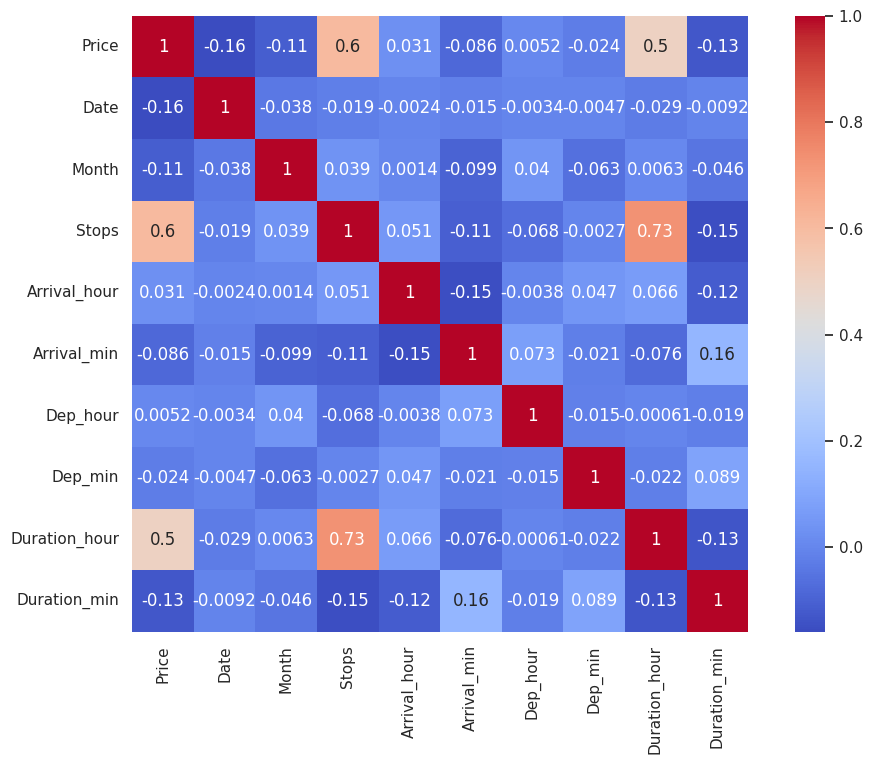

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , square = True)

**Strong Correlations:**

*   **Price and Stops** (0.602): Indicates a strong positive correlation, suggesting that an increase in the number of stops is associated with an increase in ticket prices.
*   **Stops and Duration_hour** (0.730): Indicates that more stops lead to longer flight durations, which makes intuitive sense.

**Moderate Correlations:**

*   **Price and Duration_hour** (0.504): Indicates a moderate positive correlation, meaning longer flights tend to have higher prices.
*   **Arrival_min and Duration_min** (0.156): Indicates a weak but positive correlation, implying a slight relationship between arrival minutes and flight duration minutes.


**Weak or Negligible Correlations with Price**:

*   **Price and Date** (-0.159): Indicates a weak negative correlation, suggesting that ticket prices may slightly decrease on specific dates.

*   **Price and Month** (-0.113): Indicates a weak negative correlation, showing that the month of travel has minimal impact on prices.

*   **Price and Arrival_min** (-0.086): Very weak negative correlation, meaning arrival time (in minutes) doesn't significantly influence price.

**Interesting Relationships Among Features**:

*   **Dep_min and Duration_min** (0.089): A weak positive correlation, indicating minimal influence of departure time minutes on flight duration.

*   **Arrival_hour and Duration_hour** (0.065): A weak positive correlation suggests arrival time (hour) is loosely related to flight duration.
Dep_hour and all other features show negligible correlations, implying departure hour may not be a strong predictor of price or duration

**Negligible Relationships Across Most Features**:


*  Features such as Month, Date, Dep_hour, and Dep_min show very weak or no significant correlation with most other variables, meaning their impact on Price or other flight characteristics is minimal.

**Feature importance using ExtraTreeRegressor**

In [82]:
from sklearn.ensemble import ExtraTreesRegressor

In [83]:
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [84]:
selection.feature_importances_

array([1.43786635e-01, 5.38274970e-02, 2.29123742e-01, 2.84146836e-02,
       1.95690513e-02, 2.39736271e-02, 2.14169405e-02, 1.18769908e-01,
       1.68029697e-02, 1.14852144e-02, 1.80282020e-03, 1.51949824e-02,
       1.37280430e-01, 6.84083090e-02, 1.91556777e-02, 9.25667954e-04,
       3.14181974e-03, 1.05175606e-04, 5.07343034e-03, 8.77218318e-05,
       4.74909063e-04, 1.10699715e-02, 3.55968555e-03, 6.91457130e-03,
       1.11485824e-02, 1.60857209e-02, 6.29685693e-03, 5.70890271e-04,
       2.55325088e-02])

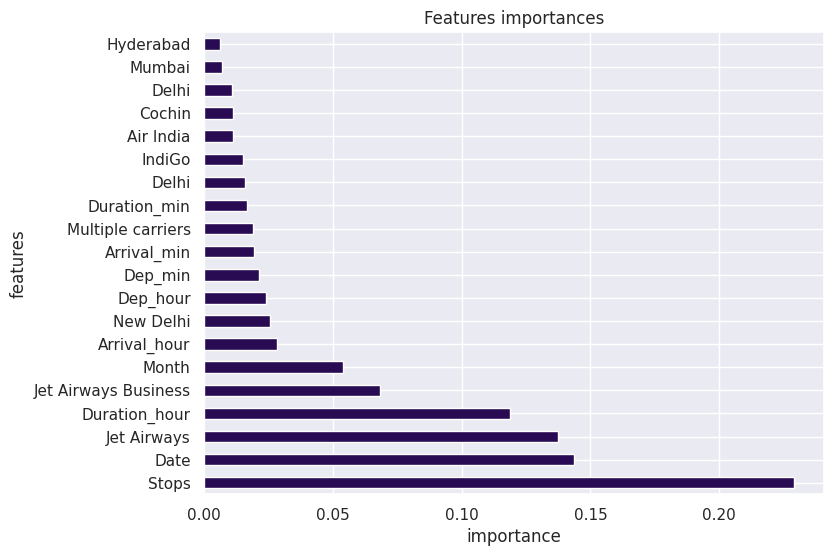

In [85]:
plt.figure(figsize=(8 ,6))
important_feature = pd.Series(selection.feature_importances_ , index = X.columns)
important_feature.nlargest(20).plot(kind = 'barh')
plt.title("Features importances")
plt.ylabel('features')
plt.xlabel('importance')
plt.show()

**Insight:**

*   The most important feature is Stops .
*   Mumbai Hyderabad etc have less importance


# **Model Training**

**Train_test_split**

In [86]:
x_train,x_test , y_train,y_test = train_test_split(X,Y , test_size = 0.25 , random_state = 42)

In [87]:
print(f"shape of x_train is {x_train.shape}")
print(f"shape of x_test is {x_test.shape}")
print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_test is {y_test.shape}")

shape of x_train is (7846, 29)
shape of x_test is (2616, 29)
shape of y_train is (7846,)
shape of y_test is (2616,)


**We do not perform feature scaling because we are using the Random Forest algorithm.**

# **Dicision Tree**

In [88]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train , y_train)

DecisionTreeRegressor()

In [89]:
predict_DT = model_DT.predict(x_test)

In [90]:
scoreDT = r2_score(predict_DT , y_test)
scoreDT

0.7235731575440987

In [91]:
print("MSE -->> ",mean_squared_error(predict_DT , y_test))
print("MAE -->> ",mean_absolute_error(predict_DT , y_test))
print("SMSE -->> ",np.sqrt(mean_squared_error(predict_DT , y_test)))

MSE -->>  5950109.738194975
MAE -->>  1396.1063009683994
SMSE -->>  2439.284677563276


# **Fitting model using Random Forest**


1.   Split dataset into train and test set in order to prediction w.r.t X_test
2.   If needed do scaling of data
3.   Scaling is not done in Random forest
4.   Import model
5.   Fit the data
6.   Predict w.r.t X_test
7.   In regression check RSME Score
7.   Plot graph

# **RandomForestRegressor**

In [92]:
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [93]:
predrfr = reg_rf.predict(x_test)

In [94]:
reg_rf.score(x_train , y_train)

0.9550781896442792

In [95]:
reg_rf.score(x_test , y_test)

0.8220567540776438

In [96]:
print("MAE" , mean_absolute_error(y_test ,predrfr ))
print("MSE" ,mean_squared_error(y_test , predrfr ))
print("rmse " ,np.sqrt(mean_squared_error(y_test , predrfr )))

MAE 1184.294427439671
MSE 3799315.42988089
rmse  1949.1832725223378


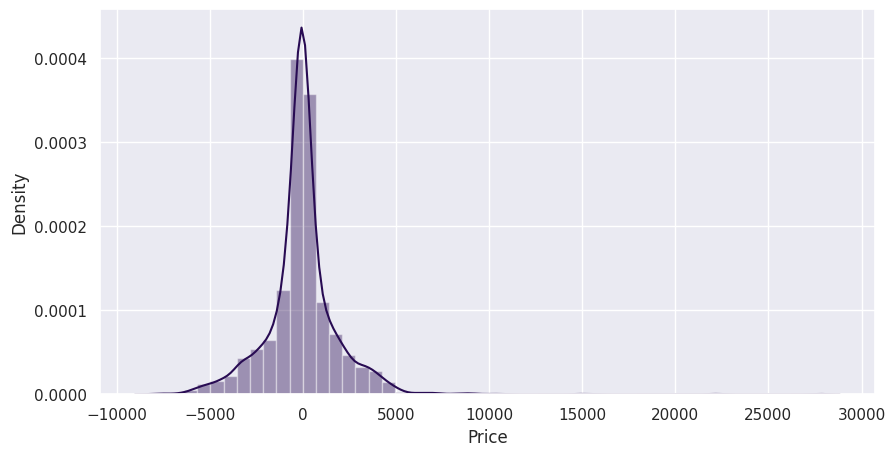

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-predrfr)
plt.show()

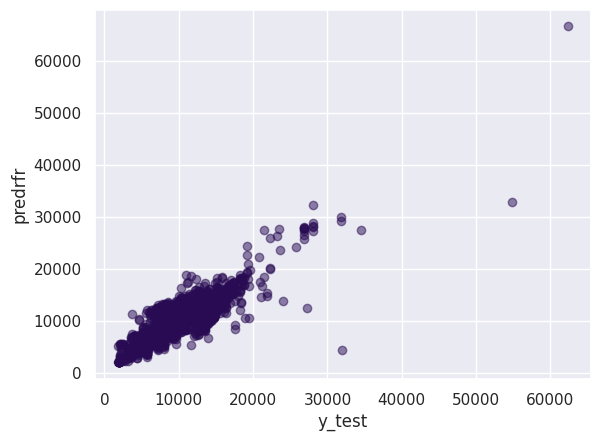

In [98]:
plt.scatter(y_test, predrfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predrfr")
plt.show()

In [99]:
scorerfr = r2_score(predrfr , y_test)
print("R2_Scoe " , scorerfr)

R2_Scoe  0.7983936964289642


In [100]:
pd.DataFrame({"Actual_Values":y_test , "Predict_Values":predrfr , "Difference" : y_test-predrfr})

,Actual_Values,Predict_Values,Difference
2150,17996,14731.867167,3264.132833
3784,3873,3841.314667,31.685333
714,4462,4237.806667,224.193333
7558,2228,4717.140000,-2489.140000
7413,4991,4475.640000,515.360000
...,...,...,...
9533,10031,11114.011000,-1083.011000
8141,13832,14462.540000,-630.540000
4895,14151,13815.280000,335.720000
9550,14781,11599.666667,3181.333333


# **Hyperparameter Tuning**
*   Choose following method for hyperparameter tuning
      1.   RandomizedSearchCV --> Fast
      2.   GridSearchCV
*     Assign hyperparameters in form of dictionery
*    Fit the model
*    Check best paramters and best score

In [101]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop=1200 , num=12)]

max_features = ["sqrt","auto", "log2", None]

# criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"] # #   This take a long time in fitting time soo i can comment this and fir without this
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split=[2,5,15,30,10,20,40,70,100]

min_samples_leaf=[1,2,3,4,5,6,7,8,9,10]

In [113]:
random_grid = {"n_estimators" : n_estimators , "max_features" : max_features ,
             "max_depth":max_depth , "min_samples_split":min_samples_split ,"min_samples_leaf":min_samples_leaf }

In [114]:
rfrGCV = RandomizedSearchCV(estimator= reg_rf , param_distributions=random_grid , scoring = "neg_mean_squared_error" , cv =5,
                          random_state = 0 , verbose = 2 , n_iter=10,)

In [115]:
rfrGCV.fit(x_train ,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=900; total time=   2.6s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 5, 15, 30, 10,
                                                              20, 40, 70, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [116]:
rfrGCV.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 25}

In [117]:
rfrGCV.best_score_

-4828609.47418928

In [118]:
pred_rfrCV = rfrGCV.predict(x_test)

In [119]:
print("MSE " ,mean_squared_error(pred_rfrCV ,y_test))
print("MAE " ,mean_absolute_error(pred_rfrCV ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(pred_rfrCV ,y_test)))

MSE  3653636.4658518233
MAE  1151.359770877151
RMSE  33.93169272048112


In [120]:
r2_score(pred_rfrCV,y_test)

0.7933799866260965

In [121]:
pd.DataFrame({"Actual_Values":y_test , "Predict_Values":pred_rfrCV , "Difference" : y_test-pred_rfrCV})

,Actual_Values,Predict_Values,Difference
2150,17996,14726.190479,3269.809521
3784,3873,3836.907709,36.092291
714,4462,4264.654471,197.345529
7558,2228,4759.398865,-2531.398865
7413,4991,4270.756424,720.243576
...,...,...,...
9533,10031,11343.551604,-1312.551604
8141,13832,13423.209478,408.790522
4895,14151,13594.472401,556.527599
9550,14781,12132.354364,2648.645636


**Try more Algoithm**

# **Linear Regressor**

In [122]:
model_LR = LinearRegression()
model_LR.fit(x_train , y_train)

LinearRegression()

In [123]:
predLR = model_LR.predict(x_test)

In [124]:
print("MSE " ,mean_squared_error(predLR ,y_test))
print("MAE " ,mean_absolute_error(predLR ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(predLR ,y_test)))

MSE  8235375.29094053
MAE  1983.3563769014886
RMSE  44.53488943403238


In [125]:
r2_score(predLR, y_test)

0.35099631572020396

# **SVR**

In [126]:
from sklearn.svm import SVC

In [127]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [128]:
pred_svc = svc_model.predict(x_test)

In [129]:
print("MSE " ,mean_squared_error(pred_svc ,y_test))
print("MAE " ,mean_absolute_error(pred_svc ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(pred_svc ,y_test)))

MSE  18092159.97744648
MAE  2732.5103211009173
RMSE  52.273418877101555


In [130]:
r2_score(pred_svc ,y_test)

-0.7522289055722557

# **GradientBoostingRegressor**

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [132]:
gbr_pred = gbr_model.predict(x_test)

In [133]:
print("MSE " ,mean_squared_error(gbr_pred ,y_test))
print("MAE " ,mean_absolute_error(gbr_pred ,y_test))
print("RMSE " ,np.sqrt(mean_absolute_error(gbr_pred ,y_test)))

MSE  4957228.813023593
MAE  1534.7659576885617
RMSE  39.17608910660381


In [134]:
r2_score(gbr_pred ,y_test)

0.6590942167233155


# **Save the model to reuse it again**

In [135]:
import pickle

In [136]:
# open a file, where you ant to store the data
file = open('flight_rf.pkl' , "wb")
# dump information to that file
pickle.dump(reg_rf ,file)

In [138]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [141]:
prediction = forest.predict(x_test)

In [145]:
r2_score(y_test,prediction)

0.8220567540776438